<a href="https://colab.research.google.com/github/sanjj271/LeetcodeAnswers/blob/main/Recognizing_MNIST_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/sample_data/mnist_train_small.csv")
print(df.shape)
print(df.head(n=5))
#print(df.columns)


(19999, 785)
   6  0  0.1  0.2  0.3  0.4  ...  0.585  0.586  0.587  0.588  0.589  0.590
0  5  0    0    0    0    0  ...      0      0      0      0      0      0
1  7  0    0    0    0    0  ...      0      0      0      0      0      0
2  9  0    0    0    0    0  ...      0      0      0      0      0      0
3  5  0    0    0    0    0  ...      0      0      0      0      0      0
4  2  0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 785 columns]


In [3]:
print(df.head(n=5))
data=df.values


   6  0  0.1  0.2  0.3  0.4  ...  0.585  0.586  0.587  0.588  0.589  0.590
0  5  0    0    0    0    0  ...      0      0      0      0      0      0
1  7  0    0    0    0    0  ...      0      0      0      0      0      0
2  9  0    0    0    0    0  ...      0      0      0      0      0      0
3  5  0    0    0    0    0  ...      0      0      0      0      0      0
4  2  0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 785 columns]


In [4]:
X=data[:,1:]
Y=data[:,0]
print(X)
print(X.shape)
print(Y.shape)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(19999, 784)
(19999,)


In [5]:
split = int(0.8 * X.shape[0])
X_train=X[:split,:]
Y_train=Y[:split]

X_test=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(15999, 784) (15999,)
(4000, 784) (4000,)


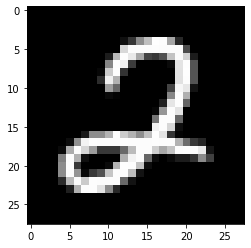

2


In [6]:
def drawimg(sample):
  img= sample.reshape((28,28))
  plt.imshow(img,cmap="gray")
  plt.show()
drawimg(X_train[4])
print(Y_train[4])

USING KNN


In [26]:
def dist(x1,x2):
  return np.sqrt(sum((x1-x2)**2))


def KNN(X,Y,querypoint,k=5):
  vals=[]
  m=X.shape[0]


  for i in range(m):
    d=dist(querypoint,X[i])
    vals.append((d,Y[i]))

  vals=sorted(vals)
  vals=vals[:k]
    
  vals=np.array(vals)
  

  new_vals = np.unique(vals[:,-1],return_counts=True)
  

  index=new_vals[1].argmax()
  pred=new_vals[0][index]

  return pred


MAKE PREDICTIONS



In [27]:
pred=KNN(X_train,Y_train,X_test[90])
print(int(pred))

4


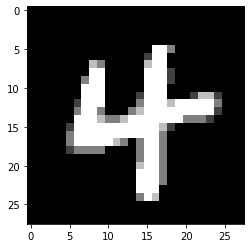

4


In [28]:
drawimg(X_test[90])
print(Y_test[90])